## Plots ##
Here we can build the plots for each sub-box by choosing it (a,b,c values). 

In [2]:
import os 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
#read files

def readh5files_r0(arx):

    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())
        for i in a_group_key:
            print(i)

        Fmean = np.array(f.get('Fmean'))
        Rmean = np.array(f.get('Rmean'))
        Mmean = np.array(f.get('Mmean'))
        time = np.array(f.get('time'))
        rho = np.array(f.get('rhomean'))
        
        M = np.array([Mmean[0,0],Mmean[0,1],Mmean[0,2], Mmean[1,1], Mmean[1,2], Mmean[2,2]])
        R = np.array([Rmean[0,0],Rmean[0,1],Rmean[0,2], Rmean[1,1], Rmean[1,2], Rmean[2,2]])
        F = np.array([Fmean[0,1], Fmean[0,2], Fmean[1,2]])
        
        eT = 0.5*rho*(R[0]+R[3]-2*R[5])
        ePI = 1.5*rho*R[5]
        
        f.close()

        print('Time           :',time,' ms')

    return [M, R, F, eT, ePI, rho]


DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-4.6e13/stresses_sigma_r0-0000.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 0.0  ms
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-4.6e13/stresses_sigma_r0-0025.h5
Keys: <KeysViewHDF5 ['F9mean', 'Fmean', 'Mmean', 'Rmean', 'r0', 'rhomean', 'sigma_F', 'sigma_F9', 'sigma_M', 'sigma_R', 'sigma_rho', 'time']>
F9mean
Fmean
Mmean
Rmean
r0
rhomean
sigma_F
sigma_F9
sigma_M
sigma_R
sigma_rho
time
Time           : 0.5  ms
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensor

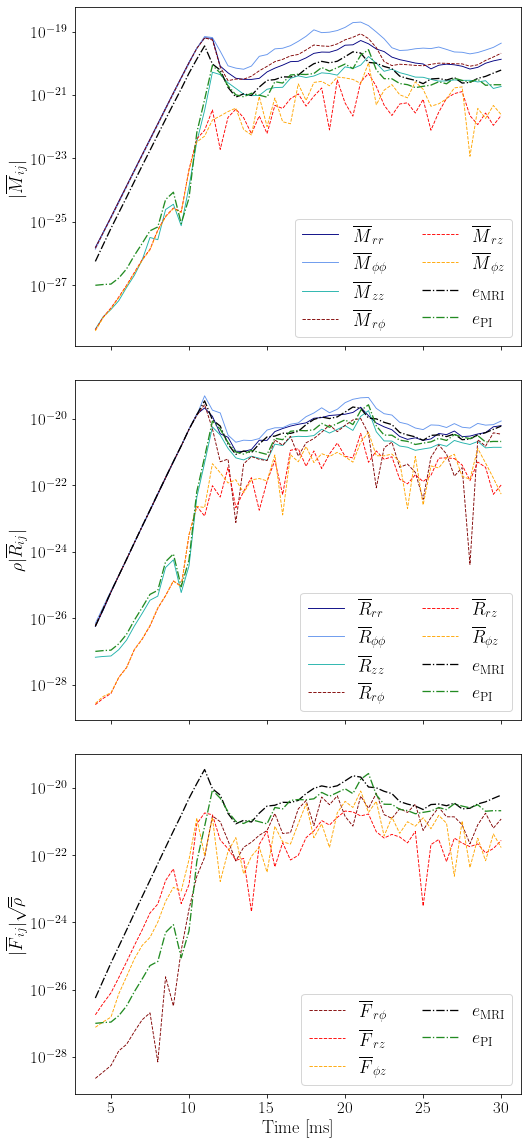

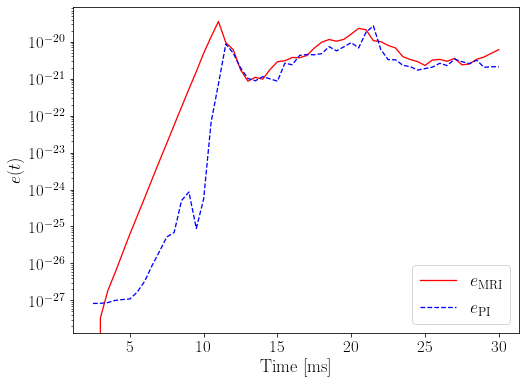

In [3]:
#t = np.linspace(0,40,401)
t = np.linspace(0,30,61)

#path_data = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_128_128_128/Carrasco--128--Std--bx3e-4--rndm-1'
path_data = '/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/pablo-model/results/stress_tensors_r0/res_100_400_100/surface_av/b0z-4.6e13'

M = np.zeros((len(t),6))
R = np.zeros((len(t),6))
F = np.zeros((len(t),3))
eT = np.zeros(len(t))
ePI = np.zeros(len(t))
rho = np.zeros(len(t))

for tt in range(0, len(t)):

    arx = format(25*tt, "04")
    M[tt], R[tt], F[tt], eT[tt], ePI[tt], rho[tt] = readh5files_r0(path_data+'/stresses_sigma_r0-'+arx+'.h5')
    
fig, ax = plt.subplots(3,1,sharex = 'all', sharey = 'none', figsize = (8,20))
M = abs(M)
print('Rho 0 = ',rho[0])

for i in range(0,6):
    R[:,i] = abs(R[:,i]*rho[:])
for i in range(0,3):
    F[:,i] = abs(F[:,i]*rho**(0.5))

for i in range(0,3):
    ax[i].tick_params(axis='y',labelsize = 17)
    ax[i].tick_params(axis='x',labelsize = 17)
    
plt.subplots_adjust(hspace = 0.1) 

colordiag = ['navy','cornflowerblue','lightseagreen']
colorndiag = ['maroon','red','orange']

ax[0].plot(t[8:],M[8:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{M}_{rr}$')
ax[0].plot(t[8:],M[8:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{M}_{\phi\phi}$')
ax[0].plot(t[8:],M[8:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{M}_{zz}$')
ax[0].plot(t[8:],M[8:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{M}_{r\phi}$')
ax[0].plot(t[8:],M[8:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{M}_{rz}$')
ax[0].plot(t[8:],M[8:,4], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{M}_{\phi z}$')
ax[0].plot(t[8:],eT[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm MRI}$')
ax[0].plot(t[8:],ePI[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'forestgreen', label = r'$e_{\rm PI}$')
ax[0].set_ylabel(r'$|\overline{M}_{ij}|$', fontsize = 18)
#ax[0].set_title(r'TEST', fontsize = 20)
ax[0].set_yscale('log')
ax[0].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[1].plot(t[8:],R[8:,0], linewidth = .9, linestyle = 'solid', color = colordiag[0], label=r'$\overline{R}_{rr}$')
ax[1].plot(t[8:],R[8:,3], linewidth = .9, linestyle = 'solid', color = colordiag[1], label=r'$\overline{R}_{\phi\phi}$')
ax[1].plot(t[8:],R[8:,5], linewidth = .9, linestyle = 'solid', color = colordiag[2], label=r'$\overline{R}_{zz}$')
ax[1].plot(t[8:],R[8:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{R}_{r\phi}$')
ax[1].plot(t[8:],R[8:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{R}_{rz}$')
ax[1].plot(t[8:],R[8:,4], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{R}_{\phi z}$')
ax[1].plot(t[8:],eT[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm MRI}$')
ax[1].plot(t[8:],ePI[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'forestgreen', label = r'$e_{\rm PI}$')
ax[1].set_ylabel(r'$\rho|\overline{R}_{ij}|$', fontsize = 18)
ax[1].set_yscale('log')
ax[1].legend(loc = 'lower right', ncol = 2, fontsize = 18)

ax[2].plot(t[8:],F[8:,0], linewidth = .9, linestyle = 'dashed', color = colorndiag[0], label=r'$\overline{F}_{r\phi}$')
ax[2].plot(t[8:],F[8:,1], linewidth = .9, linestyle = 'dashed', color = colorndiag[1], label=r'$\overline{F}_{rz}$')
ax[2].plot(t[8:],F[8:,2], linewidth = .9, linestyle = 'dashed', color = colorndiag[2], label=r'$\overline{F}_{\phi z}$')
ax[2].plot(t[8:],eT[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'k', label = r'$e_{\rm MRI}$')
ax[2].plot(t[8:],ePI[8:],linewidth = 1.3, linestyle = 'dashdot', color = 'forestgreen', label = r'$e_{\rm PI}$')
ax[2].set_ylabel(r'$|\overline{F}_{ij}|\sqrt{\overline{\rho}}$', fontsize = 18)
ax[2].set_xlabel('Time [ms]', fontsize = 18)
ax[2].set_yscale('log')
ax[2].legend(loc = 'lower right', ncol = 2, fontsize = 18)

plt.savefig('/home/miquelmiravet/Desktop/figs_mri/stresses_MRI-H1--newmodel.pdf',bbox_inches = 'tight')

fig, ax = plt.subplots(figsize=(8,6))

ax.tick_params(axis='y',labelsize = 17)
ax.tick_params(axis='x',labelsize = 17)


ax.plot(t[5:],eT[5:],linewidth = 1.3, linestyle = 'solid', color = 'r', label = r'$e_{\rm MRI}$')
ax.plot(t[5:],ePI[5:],linewidth = 1.3, linestyle = 'dashed', color = 'b', label = r'$e_{\rm PI}$')
ax.set_ylabel(r'$e(t)$', fontsize = 18)
ax.set_xlabel('Time [ms]', fontsize = 18)
ax.set_yscale('log')
ax.legend(loc = 'lower right', fontsize = 18)
plt.savefig('/home/miquelmiravet/Desktop/figs_mri/energy-dens_MRI-H1.pdf',bbox_inches = 'tight')
